In [6]:
import MDAnalysis as mda
from MDAnalysis import Universe
from MDAnalysis.analysis import density
import matplotlib.pyplot as plt 
import numpy as np 

In [25]:
# load the simulation trajectory
u = mda.Universe("h2co3_water_vap_cp2k-pos-1.xyz", "h2co3_water_vap_cp2k-pos-1.xyz")
print(u.trajectory)

<XYZReader h2co3_water_vap_cp2k-pos-1.xyz with 6414 frames of 318 atoms>


In [37]:
water = u.select_atoms('name O or name H')
ox = water.select_atoms('name O')
h1 = water.select_atoms('name H')
h2 = water.select_atoms('name H')

orientations = []
for ts in u.trajectory[10:-10:100]:
    print(ts.frame)
    water = u.select_atoms('name O or name H')
    ox = water.select_atoms('name O')
    h1 = water.select_atoms('name H')
    h2 = water.select_atoms('name H')
    for o, h1, h2 in zip(ox, h1, h2):
        # calculate the vector between the oxygen and hydrogen atoms
        vec = h1.position - o.position
        # normalize the vector
        vec /= np.linalg.norm(vec)
        orientations.append(vec)

10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510
1610
1710
1810
1910
2010
2110
2210
2310
2410
2510
2610
2710
2810
2910
3010
3110
3210
3310
3410
3510
3610
3710
3810
3910
4010
4110
4210
4310
4410
4510
4610
4710
4810
4910
5010
5110
5210
5310
5410
5510
5610
5710
5810
5910
6010
6110
6210
6310


In [30]:
import matplotlib.pyplot as plt
import numpy as np 
# calculate the histogram bins
bins = np.linspace(np.min(orientations),np.max(orientations))

# plot the histogram
plt.hist(orientations,bins=bins, density=True)
plt.xlabel('Orientation')
plt.ylabel('Probability')
plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x14d080040> (for post_execute):


KeyboardInterrupt: 

In [ ]:
z_coords = water.positions[:,2]
bin_size = (z_coords.max() - z_coords.min()) / 100
z_bins = np.arange(z_coords.min(), z_coords.max(), bin_size)
print(len(z_bins))
bin_means = []
for i in range(len(z_bins) - 1):
    bin_range = (z_coords > z_bins[i]) & (z_coords <= z_bins[i+1])
    bin_mean = z_coords[bin_range].mean()
    bin_means.append(bin_mean)

In [39]:
water = u.select_atoms('name O or name H')
ox = water.select_atoms('name O')
h1 = water.select_atoms('name H')
h2 = water.select_atoms('name H')
orientations = [[] for i in range(len(z_bins) + 1)]
print(len(orientations))
for ts in u.trajectory[10:-10:100]:
    print(ts.frame)
    water = u.select_atoms('name O or name H')
    ox = water.select_atoms('name O')
    h1 = water.select_atoms('name H')
    h2 = water.select_atoms('name H')
    for o, h1, h2 in zip(ox, h1, h2):
        # calculate the vector between the oxygen and hydrogen atoms
        vec = h1.position - o.position
        # normalize the vector
        vec /= np.linalg.norm(vec)
        # find the corresponding z-coordinate bin
        z_coord = o.position[2]
        bin_idx = np.digitize(z_coord, z_bins) - 1

        # add the orientation to the corresponding bin
        orientations[bin_idx].append(vec[2])

101
10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510
1610
1710
1810
1910
2010
2110
2210
2310
2410
2510
2610
2710
2810
2910
3010
3110
3210
3310
3410
3510
3610
3710
3810
3910
4010
4110
4210
4310
4410
4510
4610
4710
4810
4910
5010
5110
5210
5310
5410
5510
5610
5710
5810
5910
6010
6110
6210
6310


[0.52792466, 0.52532923, 0.4878992, 0.51868266, 0.664829, 0.6034393, 0.5900172, 0.5735815, 0.58710927, 0.56606895, 0.56035966, 0.5109708, 0.44201162, 0.40476304, 0.4665387, 0.42512488, 0.39675027, 0.4936577, 0.40222383, 0.40580776, 0.47949213, 0.43921, 0.40735707, 0.42248434, 0.4379948, 0.30218053, 0.39764196, 0.3359156, 0.35385785, 0.3991631, 0.32082185, 0.3111782, 0.25401866, 0.2068383, 0.1721406, 0.23279366, 0.24153048, 0.29375505, 0.32122955, 0.23532605, 0.20395227, 0.23859069, 0.13702504, 0.24755785, 0.18788685, 0.11113143, 0.103650875, 0.18075609, 0.1498839, 0.13922453, 0.20748727, 0.17335248, 0.16695584, 0.19799899, 0.13516353, 0.18508752, 0.011825053, 0.07170159, 0.011493565, -0.036489338, 0.026597003, -0.0663551, 0.0023262831, 0.11731463, 0.0695937, -0.010859907, -0.082748204, -0.16363712, -0.122738115, -0.1959542, -0.056571316, -0.2265239, -0.15670246, -0.2567647, -0.29957148, -0.26752383, -0.27786347, -0.2601424, -0.34782663, -0.38931948, -0.36300159, -0.33278018, -0.3354781

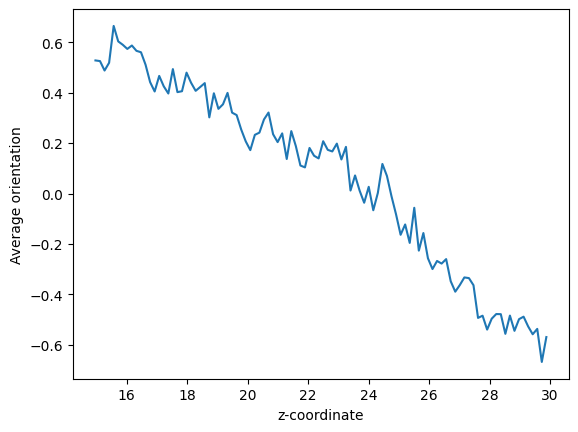

In [40]:
avg_orientations = []

for orientation_list in orientations:
    # calculate the average orientation
    avg_orientation = np.mean(orientation_list, axis=0)

    #print(orientation_list)
    avg_orientations.append(avg_orientation)

#avg_orientations = np.array(avg_orientations)
print(avg_orientations)
# plot the results
plt.plot(z_bins, avg_orientations[:-1])
plt.xlabel('z-coordinate')
plt.ylabel('Average orientation')
plt.show()